In [1]:
import pespectrum as pe
from pygama.lgdo.lh5_store import show
from pygama.lgdo.lh5_store import ls
import simultaneous_waveviewer
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import sys
from scipy.optimize import curve_fit
import csv

data = "/mnt/atlas01/users/shofinger/dsp_7/b/231824.lh5"
include_channel = ["OB-01","OB-02","OB-03","OB-05","OB-06","OB-07","OB-08","OB-09","OB-12","OB-13","OB-14","OB-17","OB-21","OB-22","OB-23","OB-24","OB-25","OB-26","OB-28","OB-29","OB-31","OB-35","OB-36","OB-37","OB-38","OB-39","OB-40"]
#bad channels ,"OB-16","OB-30"
#show(data)

cmap = open("/mnt/atlas01/projects/legend/data/com/raw/2022-04-13-sipm-test/channel-map.json")

channel_map = json.load(cmap)
channel_dict = {}
for i in channel_map["hardware_configuration"]["channel_map"]:
    channel_dict[channel_map["hardware_configuration"]["channel_map"][i]["det_id"]] = i
channel=[channel_dict[i] for i in include_channel]


In [2]:
pes = pe.create_spectrum(data,include_channel)
#print(y)

Process for OB-01 has finished
Process for OB-02 has finished
Process for OB-03 has finished
Process for OB-05 has finished
Process for OB-06 has finished
Process for OB-07 has finished
Process for OB-08 has finished
Process for OB-09 has finished
Process for OB-12 has finished
Process for OB-13 has finished
Process for OB-14 has finished
Process for OB-17 has finished
Process for OB-21 has finished
Process for OB-22 has finished
Process for OB-23 has finished
Process for OB-24 has finished
Process for OB-25 has finished
Process for OB-26 has finished
Process for OB-28 has finished
Process for OB-29 has finished
Process for OB-31 has finished
Process for OB-35 has finished
Process for OB-36 has finished
Process for OB-37 has finished
Process for OB-38 has finished
Process for OB-39 has finished
Process for OB-40 has finished


In [3]:
"""
areas = [[5,13,22],[5,17,30],[5,17,24],
         [5,15,25],[5,15,25],[5,17,30],
         
         [5,15,25],[5,15,25],[7,17,30],
         [5,15,25],[5,15,25],[5,15,25],
         
         [8,15,30],[5,13,22],[5,15,30],
         [14,22,40],[10,20,40],[5,13,22],
         
         [7,17,30],[5,12,20],[10,20,35],
         [5,15,25],[10,22,40],[5,20,35],
         
         [5,15,25],[5,20,30],[5,17,30],
         [5,15,25],[5,15,25],[5,15,25]]
"""

area_dict = {
 "OB-01":[5,13,22],
 "OB-02":[5,17,30],
 "OB-03":[5,17,24],
 "OB-05":[5,15,25],
 "OB-06":[5,15,25],
 "OB-07":[5,17,30],
 
 "OB-08":[5,15,25],
 "OB-09":[5,15,25],
 "OB-12":[7,17,30],
 "OB-13":[5,15,25],
 "OB-14":[5,15,25],
 "OB-16":[5,15,25],
 
 "OB-17":[8,15,30],
 "OB-21":[5,13,22],
 "OB-22":[5,15,30],
 "OB-23":[14,22,40],
 "OB-24":[10,20,40],
 "OB-25":[5,13,22],
 
 "OB-26":[7,17,30],
 "OB-28":[5,12,20],
 "OB-29":[10,20,35],
 "OB-30":[5,15,25],
 "OB-31":[10,22,40],
 "OB-35":[5,20,35],
 
 "OB-36":[5,15,25],
 "OB-37":[5,20,30],
 "OB-38":[5,17,30],
 "OB-39":[5,15,25],
 "OB-40":[5,15,25]}

areas=[area_dict[i] for i in include_channel]


In [4]:

result,conv = pe.fit_gaus(pes,areas,10)
#print(result)

27/27

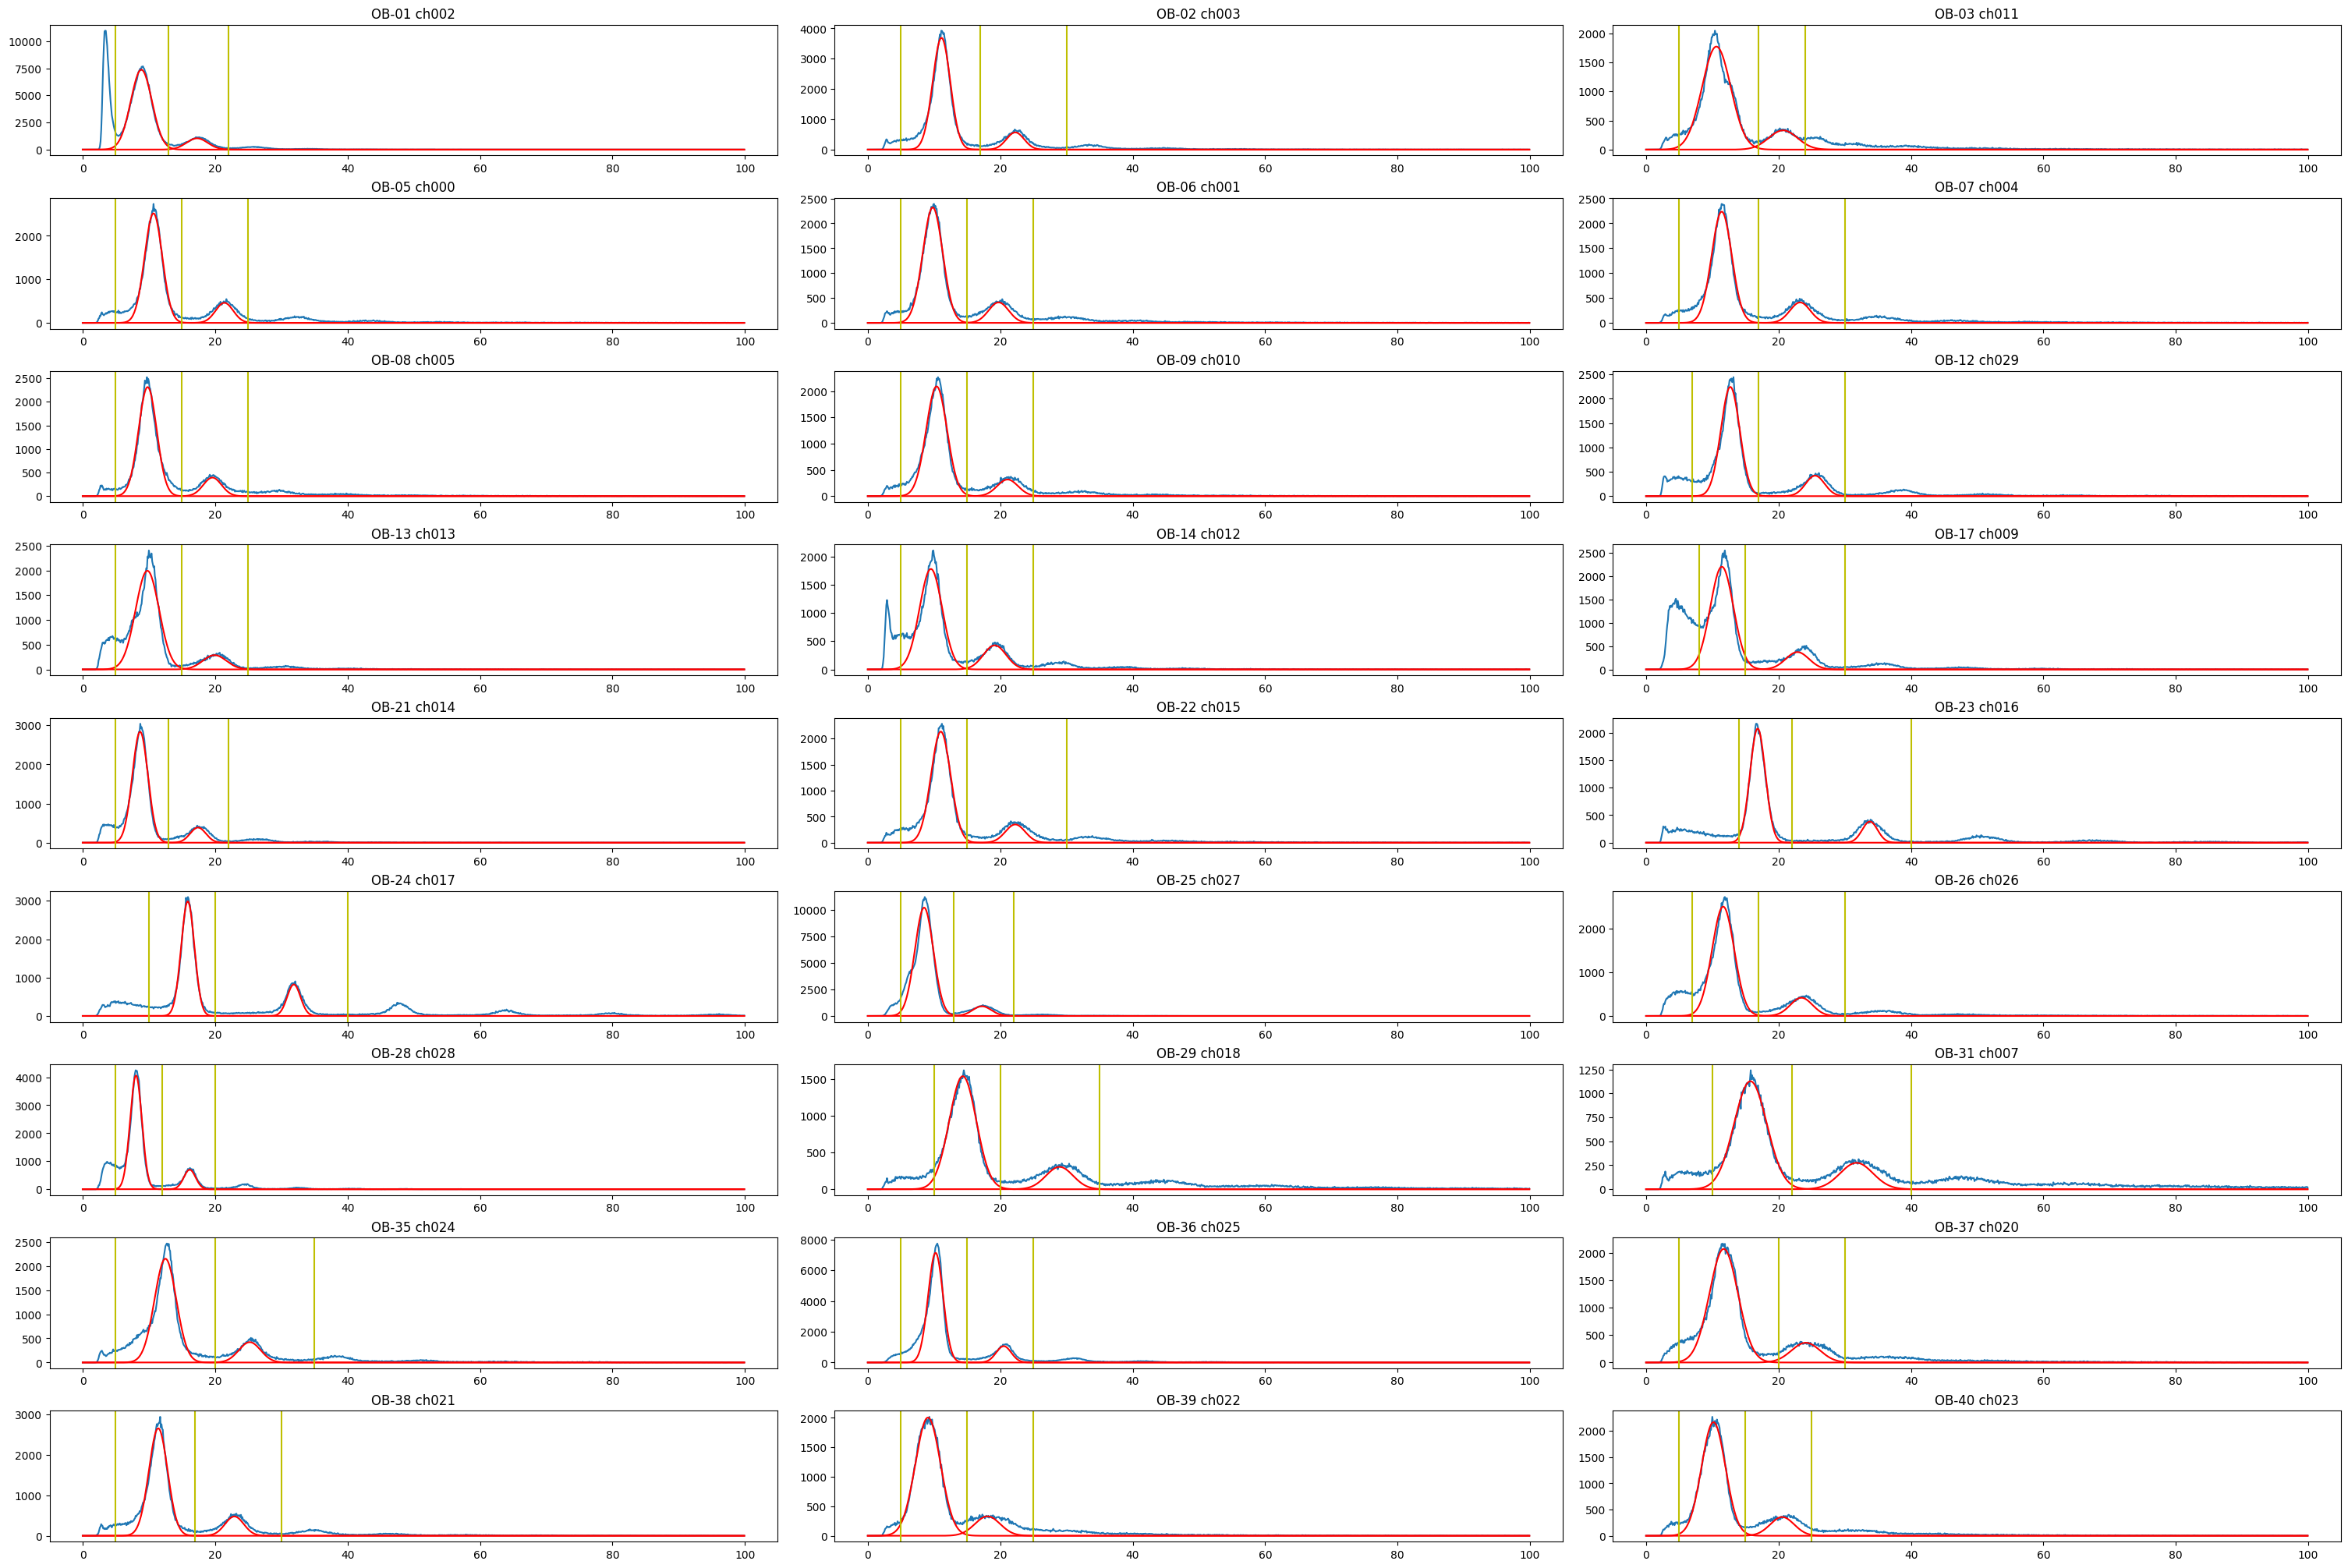

In [5]:
mul_width = 3
mul_figsize = (30,20)
fig, axs = plt.subplots(ncols=mul_width, nrows=math.ceil(len(pes)/mul_width), figsize=mul_figsize,layout="constrained")
for i in range(len(pes)):
    axs[math.floor(i/mul_width),i%mul_width].plot(pes[i][1][0:1000],pes[i][0])
    gaus0 = pe.gaus(pes[i][1][0:1000],result[i][0][0],result[i][0][1],result[i][0][2])
    gaus1 = pe.gaus(pes[i][1][0:1000],result[i][1][0],result[i][1][1],result[i][0][2])
    axs[math.floor(i/mul_width),i%mul_width].plot(pes[i][1][0:1000],gaus0,color='r')
    axs[math.floor(i/mul_width),i%mul_width].plot(pes[i][1][0:1000],gaus1,color='r')
    for j in range(3):
        axs[math.floor(i/mul_width),i%mul_width].axvline(areas[i][j],color='y')
        
        axs[math.floor(i/mul_width),i%mul_width].set_title(include_channel[i]+ " "+ str(channel[i]))
        

plt.savefig("20220418-231824-m6-muon-amajl3-mmaj3-es2000_image")
plt.show()

In [6]:
calibration = {}
for i,j in enumerate(include_channel):
    calibration[j] = result[i]

print(calibration)    

with open("calibration_data_231824","w") as f:
    json.dump(calibration,f,)

{'OB-01': [[7368.3780884966845, 8.860976371491459, 1.600718104132577], [1041.361386820612, 17.275201203190903, 2.1547604915311003]], 'OB-02': [[3687.9270032356317, 11.129624734416007, 1.3338307476649836], [567.9614261426541, 22.269907497695776, 2.103337757711718]], 'OB-03': [[1769.4205237497476, 10.616096625731245, 2.1708656760556146], [330.41362158122496, 20.68897617300159, 2.4726586067107297]], 'OB-05': [[2515.7910989969114, 10.686252409928247, 1.3365883785474109], [460.11805902903114, 21.40066259455063, 2.06655804356889]], 'OB-06': [[2319.633536214661, 9.808300467635648, 1.5102901192445182], [412.0358316110332, 19.754092781308806, 2.453607022813801]], 'OB-07': [[2234.4686680677346, 11.418296018226174, 1.5224931908624835], [411.26813044750037, 23.25748309833433, 2.5084270604076733]], 'OB-08': [[2311.899898121845, 9.80708001653953, 1.3762864938389316], [393.1580528212692, 19.589678469472272, 2.2204567952142527]], 'OB-09': [[2090.4905136278935, 10.390086877517248, 1.5742911826466452], 